In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [2]:
import plotly as py

In [3]:
from plotly.offline import iplot

In [8]:
py.offline.init_notebook_mode(connected=True)

In [2]:
data_dict = {1:{"tokens":[], "text": ""}, 0:{"tokens":[], "text": ""}} #questo dizionario conterrà i diversi dati nella struttura definita

In [3]:
df = pd.read_csv("amazon_alexa.tsv", sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.drop(df.columns[1],axis=1,inplace=True)

In [5]:
#Shape
df.shape

(3150, 4)

In [13]:
df.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   variation         3150 non-null   object
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 98.6+ KB


In [7]:
#Valore polarity da -1 a 1
sorted(set(df['rating']))

[1, 2, 3, 4, 5]

In [8]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


media caratteri recensioni positive: 11.652264085724163
media caratteri recensioni negative: 19.08171206225681


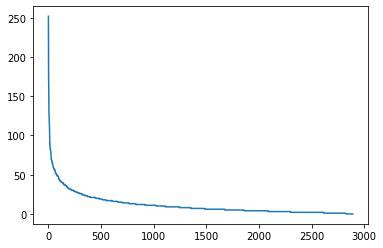

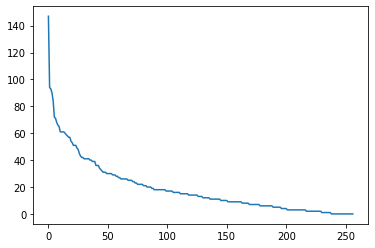

In [49]:
#lunghezza media recensioni positive e negative

reviews_len_pos = []
reviews_len_neg = []
for rec in df[df["feedback"] == 1]["verified_reviews"]:
    reviews_len_pos.append(len(rec))

mean_pos = sum(reviews_len_pos)/len(reviews_len_pos)

for rec in df[df["feedback"] == 0]["verified_reviews"]:
    reviews_len_neg.append(len(rec))

mean_neg = sum(reviews_len_neg)/len(reviews_len_neg)

print("media caratteri recensioni positive:", mean_pos)
print("media caratteri recensioni negative:", mean_neg)

plt.plot(sorted(reviews_len_pos, reverse=True))
plt.show()
plt.plot(sorted(reviews_len_neg, reverse=True))
plt.show()

In [9]:
#questo aggiunge al data_dict il testo suddividendolo nelle diverse categorie [0,1]
for k in data_dict:
    stringa = ""
    for reviews in df[df["feedback"] == k]["verified_reviews"]:
        stringa += " "+ reviews
    data_dict[k]["text"] = stringa

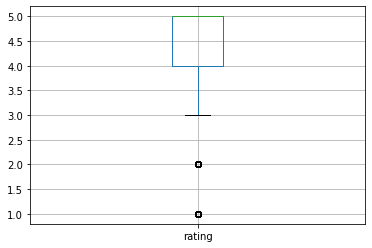

In [10]:
#Boxplot polarity
boxplot = df.boxplot(column=['rating'])

In [11]:
# fare il barplot
print(df['rating'].value_counts()[1])
print(df['rating'].value_counts()[2])
print(df['rating'].value_counts()[3])
print(df['rating'].value_counts()[4])
print(df['rating'].value_counts()[5])


161
96
152
455
2286


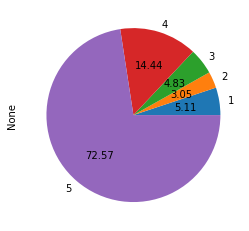

In [12]:
#piechart division
df.groupby('rating').size().plot(kind='pie', autopct='%.2f')
plt.show()

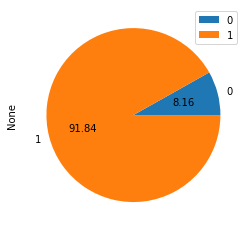

In [13]:
#piechart division
df.groupby('feedback').size().plot(kind='pie', autopct='%.2f')
plt.legend()
plt.show()

In [14]:
# stampa il numero di feedback divisi fra [0, 1]
print(df['feedback'].value_counts()[1],
df['feedback'].value_counts()[0])

2893 257


In [15]:
from wordcloud import WordCloud
import math
from operator import itemgetter
from PIL import Image 
import PIL 

In [16]:
import re
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize

In [17]:
stop = stopwords.words('english')
def process_text(text, stem=False): #clean text
    """La funzione processa del testo preso in input"""
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tokenized_text = word_tokenize(text) #tokenize
    lemmatizer = nltk.stem.WordNetLemmatizer()
    clean_text = [
            lemmatizer.lemmatize(word) for word in tokenized_text
         if not word in stop and len(word)>2
    ] #creo una lista con le parole piene

    return clean_text

In [18]:
# popola il dizionario con i tokens e le frequenze divise per feedback [0, 1]
for k in data_dict:
    tokens = process_text(data_dict[k]["text"])
    data_dict[k]["tokens"] = tokens
    data_dict[k]["freq"] = nltk.FreqDist(tokens)

In [33]:
data_dict[0]["freq"].most_common(10)

[('echo', 95),
 ('device', 79),
 ('work', 67),
 ('amazon', 63),
 ('alexa', 54),
 ('would', 53),
 ('time', 48),
 ('dot', 46),
 ('get', 45),
 ('one', 45)]

In [22]:
# processa il testo delle recensioni e lo appende al dataframe
df['verified_reviews']=df['verified_reviews'].apply(lambda x: process_text(x))

In [23]:
#genera la stringa totale di testo, quindi unisce tutte le recensioni sia negative che positive

tot_text = ""
for review in df['verified_reviews']:
    for w in review:
        tot_text+= " " + w
        
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(tot_text)

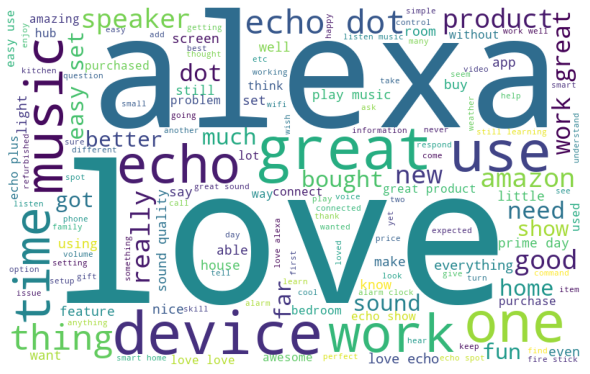

In [24]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [25]:
#aggiunge tutto il testo nel dizionario, lo si accede con la chiave "total_text"
data_dict["total_text"] = {}
data_dict["total_text"]["text"] = tot_text
data_dict["total_text"]["tokens"] = process_text(data_dict["total_text"]["text"])
data_dict["total_text"]["freq"] = nltk.FreqDist(data_dict["total_text"]["tokens"])


<AxesSubplot:>

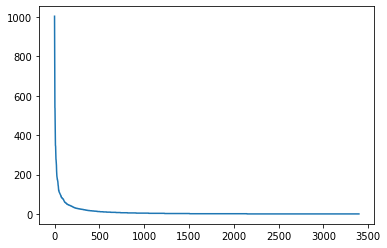

In [26]:
#plotta la distribuzione delle frquenze dei token
import seaborn as sns

lista_freq = [data_dict["total_text"]["freq"][x] for x in data_dict["total_text"]["freq"]]
sns.lineplot(data = lista_freq)

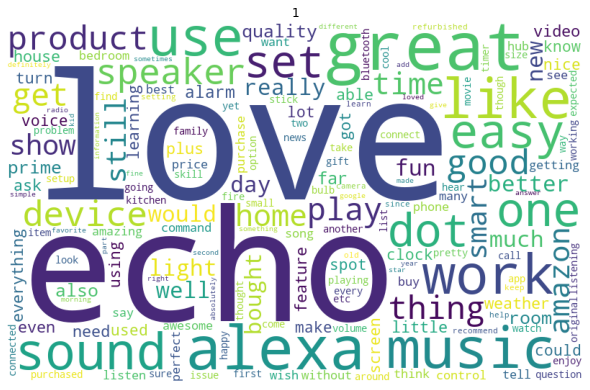

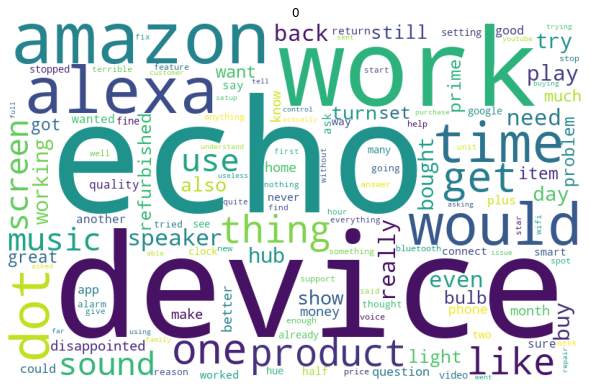

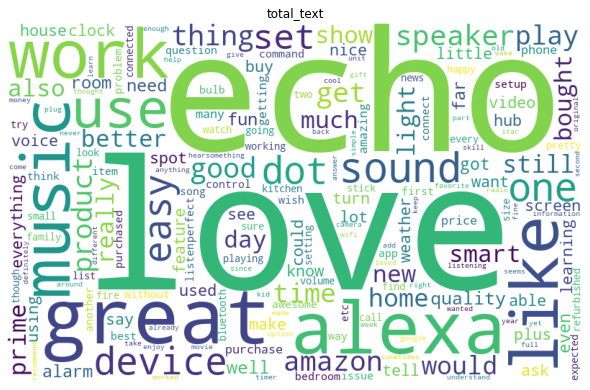

In [27]:
#genera una wordcloud per ogni feedback [0, 1]

for k in data_dict:
    wordcloud = WordCloud(width = 800, height = 500, 
                          background_color ='white', min_font_size = 10).generate_from_frequencies(data_dict[k]["freq"])
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.title(k)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0) 
    plt.show()

In [50]:
for k in data_dict:
    print("Il numero di token per", k, "è", len(data_dict[k]["tokens"]))

Il numero di token per 1 è 33710
Il numero di token per 0 è 4904
Il numero di token per total_text è 38534


In [52]:
for k in data_dict:
    print("Il numero di parole tipo per", k, "è", len(set(data_dict[k]["tokens"])))
    print("La ttr per", k, "è", len(set(data_dict[k]["tokens"]))/len(data_dict[k]["tokens"]))

Il numero di parole tipo per 1 è 3075
La ttr per 1 è 0.0912192227825571
Il numero di parole tipo per 0 è 1318
La ttr per 0 è 0.2687601957585644
Il numero di parole tipo per total_text è 3397
La ttr per total_text è 0.0881559142575388
